In [3]:
# MAG analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set(style="whitegrid")

In [ ]:
mag_full = pd.read_csv('../Table_S8_MAG_list.csv')

In [3]:
#Creates df which only includes samples which were filtered for (removal of Hsap reads)
mag=mag_full.loc[mag_full['HSAP_FILTER']=="YES"]

In [4]:
# Creates a df of only the assemblies generated from PB or ONT (excluding the hybrid...will investigate hybrid later)
mag_sub=mag.loc[mag['DATA_TYPE']!="HYBRID"]
mag_sub.head()
mag_sub.describe()

,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,closest_placement_ani,closest_placement_af,Complete,High-Quality
count,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4791.000000,4.791000e+03,4791.000000,4791.000000,4521.000000,4521.000000,4791.000000,4791.000000
mean,94.866303,1.413392,4.775621,69.509706,0.872900,322.593579,2.794559e+06,0.463264,2516.579002,96.428153,0.839033,0.379044,0.761636
std,7.405823,1.763153,5.079571,228.787113,0.023189,26.770491,8.588477e+05,0.089872,714.964999,2.899667,0.092457,0.485200,0.426127
min,70.000000,0.000000,1.000000,0.000000,0.766000,198.372306,5.438200e+05,0.250000,509.000000,77.390000,0.120000,0.000000,0.000000
25%,93.080000,0.280000,1.000000,8.000000,0.859000,305.918768,2.188777e+06,0.410000,1986.000000,96.140000,0.790000,0.000000,1.000000
50%,98.420000,0.710000,2.000000,18.000000,0.874000,322.831565,2.679435e+06,0.460000,2433.000000,97.010000,0.850000,0.000000,1.000000
75%,99.950000,1.880000,7.000000,46.000000,0.888000,342.365502,3.332793e+06,0.540000,2975.000000,97.670000,0.910000,1.000000,1.000000
max,100.000000,9.960000,20.000000,7461.000000,0.932000,389.619196,6.622204e+06,0.670000,5935.000000,99.680000,1.000000,1.000000,1.000000


In [5]:
#create a df which only includes ONT and PB samples (non-hybrid) with complete MAGs
cmag_sub=mag_sub.loc[mag_sub['Complete']==1]
cmag_sub.describe()



,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,Average_Gene_Length,Genome_Size,GC_Content,Total_Coding_Sequences,closest_placement_ani,closest_placement_af,Complete,High-Quality
count,1816.000000,1816.000000,1816.0,1816.000000,1816.000000,1816.000000,1.816000e+03,1816.000000,1816.000000,1734.000000,1734.000000,1816.0,1816.0
mean,98.705771,0.810562,1.0,110.980176,0.876447,328.524021,2.736223e+06,0.451200,2425.670154,96.376044,0.862445,1.0,1.0
std,1.864366,0.880186,0.0,325.065197,0.023757,22.198515,8.146176e+05,0.087781,665.489099,3.079082,0.077620,0.0,0.0
min,90.240000,0.000000,1.0,6.000000,0.775000,259.256757,1.193571e+06,0.250000,1210.000000,77.920000,0.220000,1.0,1.0
25%,97.780000,0.220000,1.0,17.000000,0.864000,311.712091,2.154024e+06,0.410000,1927.750000,96.130000,0.820000,1.0,1.0
50%,99.785000,0.480000,1.0,33.000000,0.881000,326.647955,2.564618e+06,0.450000,2294.500000,97.035000,0.880000,1.0,1.0
75%,99.980000,1.110000,1.0,77.000000,0.891000,345.477235,3.202694e+06,0.510000,2868.000000,97.917500,0.920000,1.0,1.0
max,100.000000,4.970000,1.0,7461.000000,0.930000,382.854907,6.613150e+06,0.670000,5203.000000,99.480000,1.000000,1.0,1.0


In [6]:
cmag_sub.head()

,SAMPLE,GROUP,HSAP_FILTER,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Name,Completeness,Contamination,Contig_Number,...,fastani_reference,closest_placement_ani,closest_placement_af,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",warnings,Circular_Complete,Complete,High-Quality
10,Hsap_meta_d5.v1.metaflye_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metaflye,pb,complete.241,100.0,0.0,1,...,GCF_003477605.1,96.25,0.83,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002435545.1, s__Eubacterium_F sp002435545,...",NaN,TBD,1,1
11,Hsap_meta_d5.v1.metaflye_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metaflye,pb,complete.127,100.0,0.0,1,...,NaN,94.06,0.87,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCF_003252795.1, s__Haemophilus_D parainfluenz...",Genome not assigned to closest species as it f...,TBD,1,1
12,Hsap_meta_d5.v1.sub_40G.metaflye_HiFi.HiFi_MAG...,D5,YES,SUB_40G,metaflye,pb,complete.68,100.0,0.0,1,...,GCF_003477605.1,96.18,0.83,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_900539115.1, s__Eubacterium_F sp900539115,...",NaN,TBD,1,1
13,Hsap_meta_d5.v1.metamdbg_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metamdbg,pb,complete.155,100.0,0.0,1,...,NaN,94.01,0.86,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCF_003252795.1, s__Haemophilus_D parainfluenz...",Genome not assigned to closest species as it f...,TBD,1,1
14,Hsap_meta_d5.v1.metamdbg_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metamdbg,pb,complete.131,100.0,0.0,1,...,GCF_003477605.1,96.23,0.82,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002435545.1, s__Eubacterium_F sp002435545,...",NaN,TBD,1,1


In [7]:
#create df specific for hybrid, no hsap, and metamdbg (for cMAG final file)

cmag_sub2=mag.loc[mag['Complete']==1]

mag_list_final=cmag_sub2.loc[(cmag_sub2['HSAP_FILTER']=='YES') & (cmag_sub2['ASSEMBLY_METHOD']=='metamdbg')]
mag_list_f=mag_list_final.loc[mag_list_final['DATA_TYPE']=='HYBRID']
mag_list_f.head()
mag_list_f.to_csv('2mag_final.csv')


In [8]:
#further remove samples not included in sub-sampling analysi (B2, H5)
cmag_subf=cmag_sub.loc[(cmag_sub['GROUP']!='B2') & (cmag_sub['GROUP']!='H5')]

In [9]:
cmag_subf.head()

,SAMPLE,GROUP,HSAP_FILTER,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Name,Completeness,Contamination,Contig_Number,...,fastani_reference,closest_placement_ani,closest_placement_af,classification_method,note,"other_related_references(genome_id,species_name,radius,ANI,AF)",warnings,Circular_Complete,Complete,High-Quality
10,Hsap_meta_d5.v1.metaflye_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metaflye,pb,complete.241,100.0,0.0,1,...,GCF_003477605.1,96.25,0.83,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002435545.1, s__Eubacterium_F sp002435545,...",NaN,TBD,1,1
11,Hsap_meta_d5.v1.metaflye_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metaflye,pb,complete.127,100.0,0.0,1,...,NaN,94.06,0.87,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCF_003252795.1, s__Haemophilus_D parainfluenz...",Genome not assigned to closest species as it f...,TBD,1,1
12,Hsap_meta_d5.v1.sub_40G.metaflye_HiFi.HiFi_MAG...,D5,YES,SUB_40G,metaflye,pb,complete.68,100.0,0.0,1,...,GCF_003477605.1,96.18,0.83,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_900539115.1, s__Eubacterium_F sp900539115,...",NaN,TBD,1,1
13,Hsap_meta_d5.v1.metamdbg_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metamdbg,pb,complete.155,100.0,0.0,1,...,NaN,94.01,0.86,taxonomic classification defined by topology a...,classification based on placement in class-lev...,"GCF_003252795.1, s__Haemophilus_D parainfluenz...",Genome not assigned to closest species as it f...,TBD,1,1
14,Hsap_meta_d5.v1.metamdbg_HiFi.HiFi_MAG.summary...,D5,YES,ALL,metamdbg,pb,complete.131,100.0,0.0,1,...,GCF_003477605.1,96.23,0.82,taxonomic classification defined by topology a...,topological placement and ANI have congruent s...,"GCA_002435545.1, s__Eubacterium_F sp002435545,...",NaN,TBD,1,1


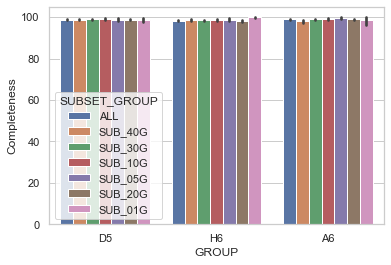

In [10]:
# confirms dataset which includes D5, A6, H6 at all subsampling depths and the full depth (human removed)
sns.barplot(data=cmag_subf, x="GROUP", y="Completeness", hue="SUBSET_GROUP") 

In [11]:
#creates a df that only retains the best ONT assemblies
mag_ont_best=cmag_subf.loc[(cmag_subf['DATA_TYPE']=='ont') & (cmag_subf['ASSEMBLY_METHOD']=='metaflye')]
#mag_ont_best.shape
mag_ont_best.head()


#creates a df that only retains the best PB assemblies
mag_pb_best=cmag_subf.loc[(cmag_subf['DATA_TYPE']=='pb') & (cmag_subf['ASSEMBLY_METHOD']=='metamdbg')]
mag_pb_best.shape
#(1454, 30)

#30Gb ONT subsample only
mag_ont_best_30G=mag_ont_best.loc[mag_ont_best['SUBSET_GROUP']=='SUB_30G']
mag_ont_best_30G.shape
#(242, 30)


#30Gb PB subsample only
mag_pb_best_30G=mag_pb_best.loc[mag_pb_best['SUBSET_GROUP']=='SUB_30G']
mag_pb_best_30G.shape
#(300, 30)



(158, 30)

In [12]:
#concatenate panda df of best ONT and best PB of 30G subsample only
frames=[mag_pb_best_30G, mag_ont_best_30G]
best_30G=pd.concat(frames)

best_30G.shape
#result: (542, 30)

#concatenate pandas including all of the best ont and pb data
frames2=[mag_ont_best, mag_pb_best]
best_all=pd.concat(frames2)
best_all.shape

(1093, 30)

In [13]:
####################
# Make figures

In [17]:
# Built in check to assess files
cmag_subf_ont=cmag_subf.loc[cmag_subf['DATA_TYPE']=='ont']
cmag_subf_ont.shape # has 542 cMAGs

cmag_subf_pb=cmag_subf.loc[cmag_subf['DATA_TYPE']=='pb']
cmag_subf_pb.shape #has 1255 cMAGs

(1256, 30)

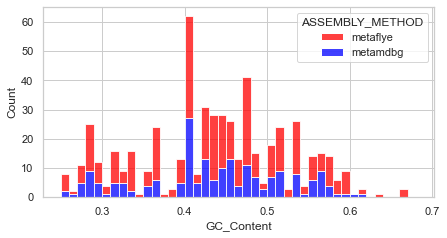

In [ ]:
# GC content analysis...includes stats only for complete MAGs (not needed) ONT
plt.subplots(figsize=(7,3.5))
colors=["red","blue"]
hue_order=["metaflye","metamdbg"]
sns.histplot(data=cmag_subf_ont, x="GC_Content", binwidth=0.01, bins=1000, hue="ASSEMBLY_METHOD",hue_order=hue_order,multiple="stack", palette=colors)
plt.savefig("../Figures/supp_fig3G_ONT_GC.png", dpi=600)


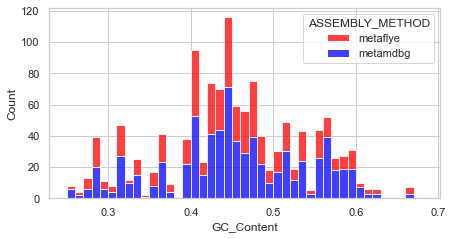

In [ ]:
# includes stats only for complete MAGs (not needed) ONT
plt.subplots(figsize=(7,3.5))
colors=["red","blue"]
hue_order=["metaflye","metamdbg"]
sns.histplot(data=cmag_subf_pb, x="GC_Content", binwidth=0.01, bins=1000, hue="ASSEMBLY_METHOD",hue_order=hue_order,multiple="stack", palette=colors)
plt.savefig("../Figures/supp_fig3G_PB_GC.png", dpi=600)

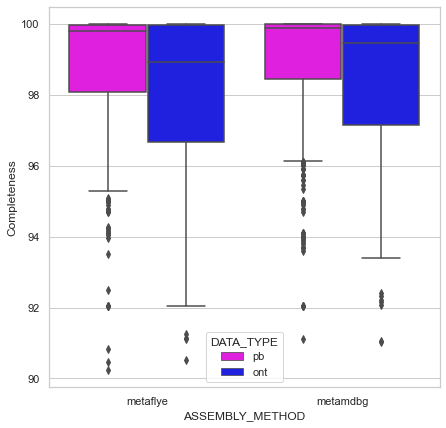

In [ ]:
## includes stats only for complete MAGs from best of each technology and assembler (ONT-metaflye, PB-metamdbg)
#only showing the three samples which were processed with subsampling
plt.subplots(figsize=(7,7))
sns.boxplot(data=cmag_subf, x="ASSEMBLY_METHOD", y="Completeness", hue="DATA_TYPE", palette=['magenta', 'blue'])
plt.savefig("../Figures/supp_fig3H_ONTvPB_completeness.png", dpi=600)



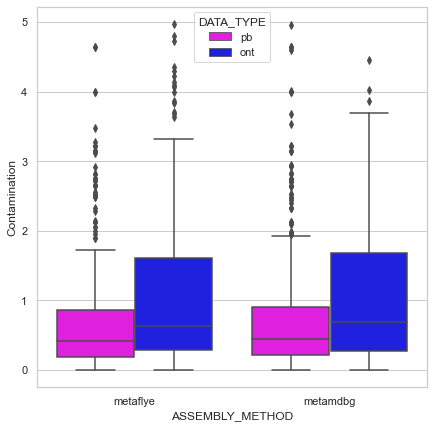

In [ ]:
#only showing the three samples which were processed with subsampling
plt.subplots(figsize=(7,7))
sns.boxplot(data=cmag_subf, x="ASSEMBLY_METHOD", y="Contamination", hue="DATA_TYPE", palette=['magenta', 'blue'])
plt.savefig("../Figures/supp_fig3I_ONTvPB_contamination.png", dpi=600)


In [38]:
##Stats run to compare the best assembly of PB (metamdbg) vs best of ONT (metaflye)

#df name: best_all 
#df names: mag_ont_best, mag_pb_best ...(contains the PB metamdbg for all subsampling of a6, d5, and h6; contains the ont for metaflye for all subsampling of a6, d5, h6)


stats.mannwhitneyu(mag_ont_best['Completeness'], mag_pb_best['Completeness'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=95832.0, pvalue=5.767199020021022e-13)

stats.mannwhitneyu(mag_ont_best['Contamination'], mag_pb_best['Contamination'], use_continuity=True, alternative='two-sided')
#MannwhitneyuResult(statistic=154310.0, pvalue=1.8348210103825967e-06)

MannwhitneyuResult(statistic=95832.0, pvalue=5.767199020021022e-13)

In [39]:
#groups by the various columns - saves the cMAGs for the subsampled groups only A6, D5, H6
gb_raw=mag_full.groupby(['HSAP_FILTER', 'GROUP', 'SUBSET_GROUP','ASSEMBLY_METHOD', 'DATA_TYPE']).sum()

gb_raw

gb_raw.to_csv('grouped_raw.csv')

In [41]:
pwd

'/Users/jminich/Desktop/LR_MG_REVISION/LR-MG_Data/Notebooks-analysis'

In [ ]:
############################
# Sub sampling analysis
# create df excluding the hybrid
# example 
#mag_pb_best=mag_sub.loc[(mag_sub['DATA_TYPE']=='HIFI') & (mag_sub['ASSEMBLY_METHOD']=='metamdbg')]
gb_all=pd.read_csv('../Table_S9_MAG_count_summary.csv') #based on grouped raw with added metadata
gb_all.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
0,NO,A6,SUB_01G,metaflye,ont,1015.17,40.11,45.0,114.0,9.443,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NO,A6,SUB_01G,metaflye,pb,947.85,8.01,70.0,118.0,8.718,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NO,A6,SUB_01G,metamdbg,ont,83.50,1.23,5.0,29.0,0.868,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NO,A6,SUB_01G,metamdbg,pb,983.85,19.35,71.0,87.0,8.708,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NO,A6,SUB_05G,metaflye,ont,2396.00,45.20,88.0,638.0,22.480,...,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
gb_nohsap=gb_all.loc[gb_all['HSAP_FILTER']=='YES']
gb_A6=gb_nohsap.loc[gb_nohsap['GROUP']=='A6']
gb_A6

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
92,YES,A6,ALL,metaflye,HYBRID,8766.50,108.46,328.0,11318.0,79.657,...,NaN,0,1,5.765655e+10,57657.0,57.657,11786.0,30.0,5762236.0,1.0
93,YES,A6,ALL,metaflye,ont,10198.50,198.14,493.0,10316.0,96.352,...,NaN,0,0,7.747334e+10,77473.0,77.000,27272.0,17.0,6305383.0,1.0
94,YES,A6,ALL,metaflye,pb,8628.44,122.89,362.0,7232.0,78.732,...,NaN,0,0,3.650939e+10,36509.0,37.000,9698.0,33.0,4436775.0,1.0
95,YES,A6,ALL,metamdbg,HYBRID,11103.15,151.88,452.0,12816.0,100.893,...,NaN,0,1,5.765655e+10,57657.0,57.657,11786.0,30.0,5762236.0,1.0
96,YES,A6,ALL,metamdbg,ont,6477.62,123.79,346.0,8871.0,60.404,...,NaN,0,0,7.747334e+10,77473.0,77.000,27272.0,17.0,6305383.0,1.0
97,YES,A6,ALL,metamdbg,pb,8631.43,125.78,313.0,6125.0,77.971,...,NaN,0,0,3.650939e+10,36509.0,37.000,9698.0,33.0,4436775.0,1.0
98,YES,A6,SUB_01G,metaflye,ont,880.92,37.40,34.0,107.0,8.606,...,NaN,1,0,1.000000e+09,1000.0,1.000,27158.0,17.0,81678.0,1.0
99,YES,A6,SUB_01G,metaflye,pb,1126.99,13.03,80.0,149.0,10.436,...,NaN,1,0,1.000002e+09,1000.0,1.000,9690.0,33.0,121466.0,1.0
100,YES,A6,SUB_01G,metamdbg,ont,99.72,2.53,8.0,14.0,0.903,...,NaN,1,0,1.000000e+09,1000.0,1.000,27158.0,17.0,81678.0,1.0
101,YES,A6,SUB_01G,metamdbg,pb,914.16,7.65,51.0,103.0,8.753,...,1.250000,1,0,1.000002e+09,1000.0,1.000,9690.0,33.0,121466.0,1.0


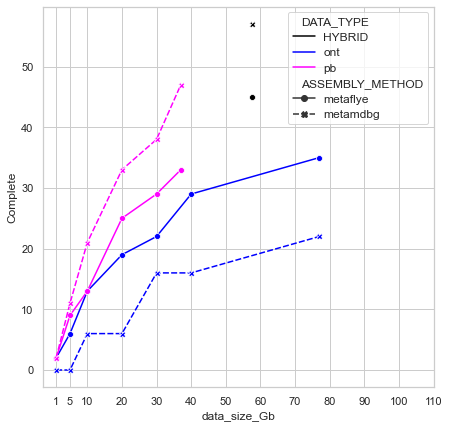

In [ ]:
#figure on sequencing depth vs. complete MAGs contrasted across seq platform and assembler for A6

plt.figure(figsize=(7,7))
g=sns.lineplot(data=gb_A6, x="data_size_Gb", y="Complete", hue="DATA_TYPE", style="ASSEMBLY_METHOD", markers=True, palette=['black','blue', 'magenta'])#, units="GROUP", estimator=None, ]
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100, 110], ['1', '5','10','20', '30', '40', '50', '60', '70', '80', '90', '100','110'])
plt.savefig("../Figures/supp_fig3A_A6_sub.png", dpi=600, bbox_inches="tight")



In [7]:
#create df for D5
gb_nohsap=gb_all.loc[gb_all['HSAP_FILTER']=='YES']
gb_D5=gb_nohsap.loc[gb_nohsap['GROUP']=='D5']
gb_D5

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
154,YES,D5,ALL,metaflye,HYBRID,13112.20,164.32,461.0,13835.0,119.137,...,NaN,0,1,6.981627e+10,69816.0,69.816,8720.0,30.0,10225388.0,1.0
155,YES,D5,ALL,metaflye,ont,13702.70,213.68,881.0,18232.0,126.558,...,NaN,0,0,1.030000e+11,102663.0,103.000,9052.0,16.0,28059781.0,1.0
156,YES,D5,ALL,metaflye,pb,13506.07,154.86,578.0,9455.0,123.427,...,NaN,0,0,4.864155e+10,48642.0,49.000,8350.0,38.0,6737853.0,1.0
157,YES,D5,ALL,metamdbg,HYBRID,15418.39,215.35,572.0,19378.0,140.849,...,NaN,0,1,6.981627e+10,69816.0,69.816,8720.0,30.0,10225388.0,1.0
158,YES,D5,ALL,metamdbg,ont,8346.87,141.21,509.0,14651.0,78.813,...,NaN,0,0,1.030000e+11,102663.0,103.000,9052.0,16.0,28059781.0,1.0
159,YES,D5,ALL,metamdbg,pb,13310.06,170.28,453.0,13962.0,120.740,...,NaN,0,0,4.864155e+10,48642.0,49.000,8350.0,38.0,6737853.0,1.0
160,YES,D5,SUB_01G,metaflye,ont,392.73,3.07,19.0,132.0,3.516,...,NaN,1,0,1.000028e+09,1000.0,1.000,9102.0,16.0,272653.0,1.0
161,YES,D5,SUB_01G,metaflye,pb,687.23,2.20,55.0,195.0,6.163,...,NaN,1,0,1.000003e+09,1000.0,1.000,8332.0,38.0,138631.0,1.0
162,YES,D5,SUB_01G,metamdbg,pb,683.78,2.10,51.0,197.0,6.165,...,1.500000,1,0,1.000003e+09,1000.0,1.000,8332.0,38.0,138631.0,1.0
163,YES,D5,SUB_01G,metamdbg,ont,NaN,NaN,NaN,NaN,NaN,...,NaN,1,0,1.000028e+09,1000.0,1.000,9102.0,16.0,272653.0,1.0


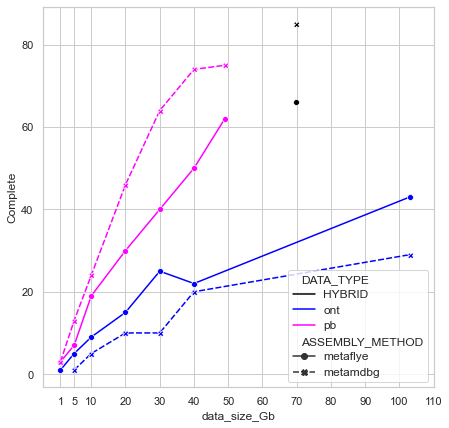

In [ ]:
#figure on sequencing depth vs. complete MAGs contrasted across seq platform and assembler for D5

plt.figure(figsize=(7,7))
g=sns.lineplot(data=gb_D5, x="data_size_Gb", y="Complete", hue="DATA_TYPE", style="ASSEMBLY_METHOD", markers=True, palette=['black','blue', 'magenta'])#, units="GROUP", estimator=None, ]
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100, 110], ['1', '5','10','20', '30', '40', '50', '60', '70', '80', '90', '100','110'])
plt.savefig("../Figures/supp_fig3B_D5_sub.png", dpi=600, bbox_inches="tight")



In [9]:
#create df for H6
gb_nohsap=gb_all.loc[gb_all['HSAP_FILTER']=='YES']
gb_H6=gb_nohsap.loc[gb_nohsap['GROUP']=='H6']


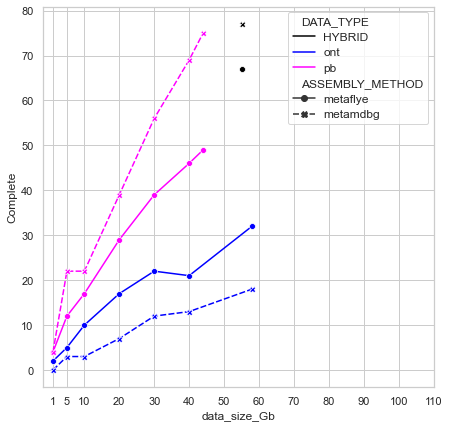

In [ ]:
#figure on sequencing depth vs. complete MAGs contrasted across seq platform and assembler for H6

plt.figure(figsize=(7,7))
g=sns.lineplot(data=gb_H6, x="data_size_Gb", y="Complete", hue="DATA_TYPE", style="ASSEMBLY_METHOD", markers=True, palette=['black','blue', 'magenta'])#, units="GROUP", estimator=None, ]
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100, 110], ['1', '5','10','20', '30', '40', '50', '60', '70', '80', '90', '100','110'])
plt.savefig("../Figures/supp_fig3C_H6_sub.png", dpi=600, bbox_inches="tight")


In [11]:
#sub sampling df (no human, no hybrid)
gb_sub=gb_all.loc[(gb_all['DATA_TYPE']!= 'HYBRID') & (gb_all['HSAP_FILTER']=='YES')] 
gb_sub.head()

gb_sub_sub=gb_sub.loc[(gb_sub['SUBSET_GROUP']!='ALL')]
gb_sub_sub.shape

(70, 30)

In [12]:
# create df of samples which are hybrid and are human filtered
gb_all.head()

gb_hyb_nohsap=gb_all.loc[(gb_all['HSAP_FILTER']=="YES") & (gb_all['DATA_TYPE']=="HYBRID")]
gb_hyb_nohsap.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
82,YES,A1,ALL,metaflye,HYBRID,1191.62,10.13,69.0,1199.0,10.347,...,NaN,0,1,5.758021e+09,5758.0,5.758,9148.0,24.0,817860.0,1.0
83,YES,A1,ALL,metamdbg,HYBRID,1604.77,17.71,83.0,1232.0,14.685,...,NaN,0,1,5.758021e+09,5758.0,5.758,9148.0,24.0,817860.0,1.0
84,YES,A2,ALL,metaflye,HYBRID,995.98,2.24,29.0,978.0,8.564,...,NaN,0,1,4.598725e+09,4599.0,4.599,13811.0,22.0,557259.0,1.0
85,YES,A2,ALL,metamdbg,HYBRID,1555.20,7.34,45.0,1054.0,13.786,...,NaN,0,1,4.598725e+09,4599.0,4.599,13811.0,22.0,557259.0,1.0
86,YES,A3,ALL,metaflye,HYBRID,2600.40,27.27,127.0,3888.0,23.681,...,NaN,0,1,1.511264e+10,15113.0,15.113,11222.0,36.0,1763589.0,1.0


/Users/jminich/miniconda3/lib/python3.6/site-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 432x432 with 0 Axes>

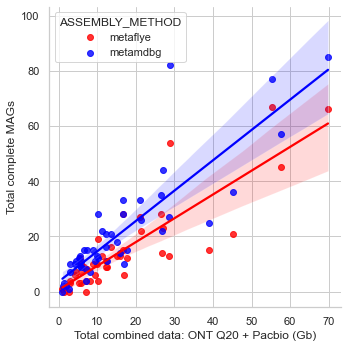

In [ ]:
plt.figure(figsize=(6,6))
colors=["red","blue"]
hue_order=["metaflye","metamdbg"]
fighyb=sns.lmplot(data=gb_hyb_nohsap, x="data_size_Gb", y="Complete",hue="ASSEMBLY_METHOD", palette=colors, hue_order=hue_order, legend_out=False)
fighyb.axes[0,0].set_xlabel('Total combined data: ONT Q20 + Pacbio (Gb)')
fighyb.axes[0,0].set_ylabel('Total complete MAGs')
plt.savefig("../Figures/Fig2F_hybrid_assembler.png", dpi=600, bbox_inches="tight")

In [15]:
gb_hyb_nohsap.to_csv('file_name.csv', index=False)

In [17]:
##regression statistics
#select only samples assembled with metaflye
metaflye=gb_hyb_nohsap.loc[gb_hyb_nohsap['ASSEMBLY_METHOD']=='metaflye']
metamdbg=gb_hyb_nohsap.loc[gb_hyb_nohsap['ASSEMBLY_METHOD']=='metamdbg']

metaflye.head()
metamdbg.head()

x_mf=metaflye['data_size_Gb']
#y_mf=metaflye['Complete']


In [18]:
# count number of cMAGs from hybrid assembly generated using different assemblers
metaflye_complete=metaflye['Complete'].sum()
print(metaflye_complete)
#673
#HQ=1359

673.0


In [19]:
# count number of cMAGs from hybrid assembly generated using different assemblers
metamdbg_complete=metamdbg['Complete'].sum()
print(metamdbg_complete)
#986
#HQ=1588

986.0


In [50]:
# calculuating number of cMAGs and Gbp for the deep sequenced samples
PB_1=gb_all.loc[(gb_all['DATA_TYPE']== 'pb') & (gb_all['HSAP_FILTER']=='YES') & (gb_all['ASSEMBLY_METHOD']=='metamdbg') &(gb_all['SUBSET_GROUP']=='ALL')] 
PB_1['Complete'] # Total cMAG = 47+75+75 = 197
PB_1['data_size_Gb'] # Total Gbp = 37+ 49+44 130


97     37.0
159    49.0
236    44.0
Name: data_size_Gb, dtype: float64

In [61]:
# calculuating number of cMAGs and Gbp for the deep sequenced samples
ont_1=gb_all.loc[(gb_all['DATA_TYPE']== 'ont') 
                 & (gb_all['HSAP_FILTER']=='YES') 
                 & (gb_all['ASSEMBLY_METHOD']=='metaflye') 
                 &(gb_all['SUBSET_GROUP']=='ALL') 
                 &(gb_all['GROUP']!='C6')
                 &(gb_all['GROUP']!='B2')
                 &(gb_all['GROUP']!='H5')] 
ont_1['Complete'] # Total cMAG = 35+43+32 = 197
#ont_1['data_size_Gb'] # Total Gbp = 77+ 103+58= 238


93     35.0
155    43.0
232    32.0
Name: Complete, dtype: float64

In [62]:
# calculuating number of cMAGs and Gbp for the deep sequenced samples
ont_mg=gb_all.loc[(gb_all['DATA_TYPE']== 'ont') 
                 & (gb_all['HSAP_FILTER']=='YES') 
                 & (gb_all['ASSEMBLY_METHOD']=='metamdbg') 
                 &(gb_all['SUBSET_GROUP']=='ALL') 
                 &(gb_all['GROUP']!='C6')
                 &(gb_all['GROUP']!='B2')
                 &(gb_all['GROUP']!='H5')] 
ont_mg.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
96,YES,A6,ALL,metamdbg,ont,6477.62,123.79,346.0,8871.0,60.404,...,NaN,0,0,7.747334e+10,77473.0,77.0,27272.0,17.0,6305383.0,1.0
158,YES,D5,ALL,metamdbg,ont,8346.87,141.21,509.0,14651.0,78.813,...,NaN,0,0,1.030000e+11,102663.0,103.0,9052.0,16.0,28059781.0,1.0
235,YES,H6,ALL,metamdbg,ont,4488.63,97.15,253.0,5999.0,42.936,...,NaN,0,0,5.804077e+10,58041.0,58.0,13214.0,16.0,11592461.0,1.0


In [70]:
print(ont_mg['Complete']) #22, 29, 18 =69
print(ont_1['Complete']) #35, 43, 32 =110  High-Quality+F:R

print(ont_mg['High-Quality+F:R']) #48,60,33 =141
print(ont_1['High-Quality+F:R']) #70+107+72 =249  High-Quality+F:R


96     22.0
158    29.0
235    18.0
Name: Complete, dtype: float64
93     35.0
155    43.0
232    32.0
Name: Complete, dtype: float64
96     48.0
158    60.0
235    33.0
Name: High-Quality+F:R, dtype: float64
93      70.0
155    107.0
232     72.0
Name: High-Quality+F:R, dtype: float64


In [66]:
PB_mf=gb_all.loc[(gb_all['DATA_TYPE']== 'pb') & 
                (gb_all['HSAP_FILTER']=='YES') & 
                (gb_all['ASSEMBLY_METHOD']=='metaflye') 
                &(gb_all['SUBSET_GROUP']=='ALL')] 


In [71]:
print(PB_mf['Complete']) #33, 62, 49 =144
print(PB_1['Complete']) #47, 75, 75 =197
print('hqMAG')
print(PB_mf['High-Quality+F:R']) #72,117,102=291
print(PB_1['High-Quality+F:R']) #75,120,115=310
PB_1.head()

94     33.0
156    62.0
233    49.0
Name: Complete, dtype: float64
97     47.0
159    75.0
236    75.0
Name: Complete, dtype: float64
hqMAG
94      72.0
156    117.0
233    102.0
Name: High-Quality+F:R, dtype: float64
97      75.0
159    120.0
236    115.0
Name: High-Quality+F:R, dtype: float64


,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
97,YES,A6,ALL,metamdbg,pb,8631.43,125.78,313.0,6125.0,77.971,...,NaN,0,0,3.650939e+10,36509.0,37.0,9698.0,33.0,4436775.0,1.0
159,YES,D5,ALL,metamdbg,pb,13310.06,170.28,453.0,13962.0,120.740,...,NaN,0,0,4.864155e+10,48642.0,49.0,8350.0,38.0,6737853.0,1.0
236,YES,H6,ALL,metamdbg,pb,12841.57,125.93,532.0,9699.0,116.206,...,NaN,0,0,4.416950e+10,44170.0,44.0,9800.0,36.0,5554527.0,1.0


In [82]:
#total number of cMAGs in the hybrid assembly with metamdbg
cmag_hyb=metamdbg['Complete'].sum()
print(cmag_hyb) #986

#total number of hqMAGs in the hybrid assembly with metamdbg
cmag_hyb=metamdbg['High-Quality+F:R'].sum()
print(cmag_hyb) #1588

cmag_mf=metaflye['Complete'].sum()
print(cmag_mf) #673

cmag_mf=metaflye['High-Quality+F:R'].sum()
print(cmag_mf) #1359

986.0
1588.0
673.0
1359.0


In [ ]:
###### data for rST8_cost-analysis
# total_MAGs
# top 3 deep sequencer for ONT +metaflye
ont_1

# top 3 deep sequencer for ONT
PB_1

In [96]:
## linear model for Gb to cMAG for metaflye (hybrid)
res=stats.linregress(metaflye['data_size_Gb'], metaflye['Complete'])
print(res)
#LinregressResult(slope=0.856790557027831, intercept=0.6436618597695887, rvalue=0.8720785838912595, pvalue=1.4555126426100417e-15, stderr=0.07167149438628682)

#NEW: LinregressResult(slope=0.8623641655095138, intercept=0.683189876701503, rvalue=0.8611965525030992, pvalue=8.109354771328903e-15, stderr=0.07587145423753276)



LinregressResult(slope=0.8623641655095138, intercept=0.683189876701503, rvalue=0.8611965525030992, pvalue=8.109354771328903e-15, stderr=0.07587145423753276)


In [97]:
## linear model for Gb to cMAG for metamdbg

res2=stats.linregress(metamdbg['data_size_Gb'], metamdbg['Complete'])
print(res2)
#LinregressResult(slope=1.074603143581574, intercept=3.965501807645385, rvalue=0.8748483145288908, pvalue=9.167738694756041e-16, stderr=0.088697322519047)

#NEW: LinregressResult(slope=1.0990996634635615, intercept=3.5994321341803683, rvalue=0.8649366060242887, pvalue=4.569999665318519e-15, stderr=0.09507085647719572)


LinregressResult(slope=1.0990996634635615, intercept=3.5994321341803683, rvalue=0.8649366060242887, pvalue=4.569999665318519e-15, stderr=0.09507085647719572)


In [98]:
### Making figures for subsampling
#df with only samples with human reads removed
nohsap=gb_sub.loc[gb_sub['HSAP_FILTER']=='YES']

#removing the samples with hybrid (will add later as a layer so as to not confuse the figure)
nohyb=nohsap.loc[nohsap['DATA_TYPE']!= 'HYBRID']



In [99]:
#retaining only samples which included replicates at 1, 5, 10, 20, and 30 Gb subsamples (n=3)
nohyb30=nohyb.loc[(nohyb['30Gb']==1) & (nohyb['best_include']==1)]

nohyb30.head

<bound method NDFrame.head of     HSAP_FILTER GROUP SUBSET_GROUP ASSEMBLY_METHOD DATA_TYPE  Completeness  \
98          YES    A6      SUB_01G        metaflye       ont        880.92   
101         YES    A6      SUB_01G        metamdbg        pb        914.16   
102         YES    A6      SUB_05G        metaflye       ont       2289.20   
105         YES    A6      SUB_05G        metamdbg        pb       3176.06   
106         YES    A6      SUB_10G        metaflye       ont       3459.43   
109         YES    A6      SUB_10G        metamdbg        pb       4902.30   
110         YES    A6      SUB_20G        metaflye       ont       5537.87   
113         YES    A6      SUB_20G        metamdbg        pb       6712.58   
114         YES    A6      SUB_30G        metaflye       ont       7098.46   
117         YES    A6      SUB_30G        metamdbg        pb       8281.74   
160         YES    D5      SUB_01G        metaflye       ont        392.73   
162         YES    D5      SUB_01G

In [100]:
nohyb30.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
98,YES,A6,SUB_01G,metaflye,ont,880.92,37.40,34.0,107.0,8.606,...,NaN,1,0,1.000000e+09,1000.0,1.0,27158.0,17.0,81678.0,1.0
101,YES,A6,SUB_01G,metamdbg,pb,914.16,7.65,51.0,103.0,8.753,...,1.250000,1,0,1.000002e+09,1000.0,1.0,9690.0,33.0,121466.0,1.0
102,YES,A6,SUB_05G,metaflye,ont,2289.20,47.11,95.0,707.0,21.692,...,NaN,1,0,5.000004e+09,5000.0,5.0,27267.0,17.0,406805.0,1.0
105,YES,A6,SUB_05G,metamdbg,pb,3176.06,42.58,126.0,1107.0,28.900,...,1.923077,1,0,5.000009e+09,5000.0,5.0,9689.0,33.0,607775.0,1.0
106,YES,A6,SUB_10G,metaflye,ont,3459.43,67.94,142.0,1302.0,32.104,...,NaN,1,0,1.000000e+10,10000.0,10.0,27340.0,17.0,812270.0,1.0


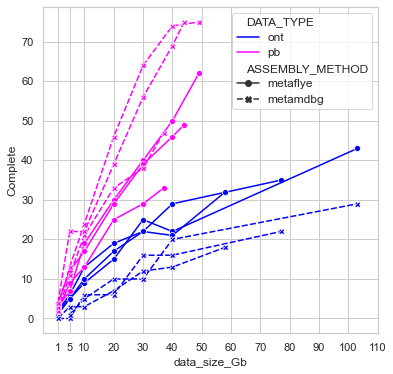

In [ ]:
#figure on sequencing depth vs. complete MAGs contrasted across seq platform and assembler
#includes all
plt.figure(figsize=(6,6))
g=sns.lineplot(data=nohyb, x="data_size_Gb", y="Complete", hue="DATA_TYPE", style="ASSEMBLY_METHOD", markers=True, units="GROUP", estimator=None, palette=['blue', 'magenta'])
plt.xticks([1,5,10,20,30,40,50,60,70,80,90,100, 110], ['1', '5','10','20', '30', '40', '50', '60', '70', '80', '90', '100','110'])
plt.savefig("../Figures/Fig2B_sub_cMAGs.png", dpi=600, bbox_inches="tight")



<Figure size 432x432 with 0 Axes>

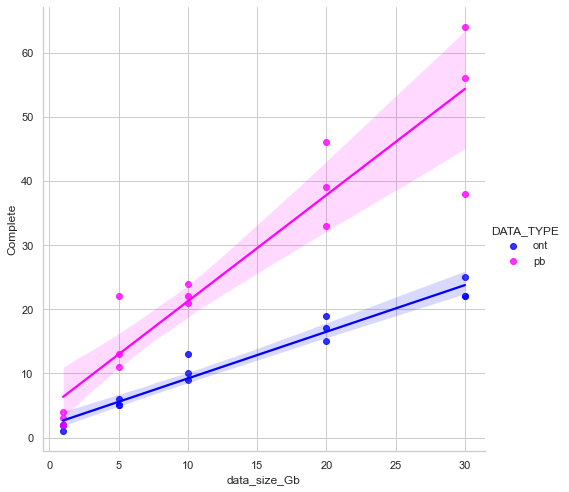

In [ ]:
## Fit a linear model to the data (1-30 Gb to ensure reps across) to quantify differences in Gb input vs MAG output for both (cMAG)

plt.figure(figsize=(6,6))
cMAG_lm=sns.lmplot(data=nohyb30, x="data_size_Gb", y="Complete", hue="DATA_TYPE", height=7, palette=['blue','magenta'])
plt.savefig("../Figures/Fig2C_cMAG_lm_30Gb.png", dpi=600, bbox_inches="tight")


In [103]:
##regression statistics
#select only samples assembled with metaflye
metaflye=nohyb30.loc[nohyb30['DATA_TYPE']=='ont']
metaflye.head

x_mf=metaflye['data_size_Gb']
y_mf=metaflye['Complete']
res=stats.linregress(x_mf, y_mf)
print(res)

## Results
#LinregressResult(slope=0.7272290314828167, intercept=1.9339101177601528, rvalue=0.9730179689232654, pvalue=1.167416181990342e-09, stderr=0.04782792180512357)

#NEW: LinregressResult(slope=0.727829848594088, intercept=1.925979331891373, rvalue=0.9801678711105564, pvalue=1.605504030508105e-10, stderr=0.04081251857933185)


LinregressResult(slope=0.727829848594088, intercept=1.925979331891373, rvalue=0.9801678711105564, pvalue=1.605504030508105e-10, stderr=0.04081251857933185)


In [104]:
##regression statistics
#select only samples assembled with metaflye
metamdbg=nohyb30.loc[nohyb30['DATA_TYPE']=='pb']
metamdbg.head

x_md=metamdbg['data_size_Gb']
y_md=metamdbg['Complete']
res=stats.linregress(x_md, y_md)
print(res)

## Results
#LinregressResult(slope=1.6669069935111753, intercept=4.8634943523191545, rvalue=0.9483866843960913, pvalue=7.452337210001635e-08, stderr=0.15458690442206804)

#New: LinregressResult(slope=1.6554914683970199, intercept=4.6808459504926745, rvalue=0.9415256640237183, pvalue=1.6495112936057176e-07, stderr=0.16431504326717083)



LinregressResult(slope=1.6554914683970199, intercept=4.6808459504926745, rvalue=0.9415256640237183, pvalue=1.6495112936057176e-07, stderr=0.16431504326717083)


In [105]:
#$$$

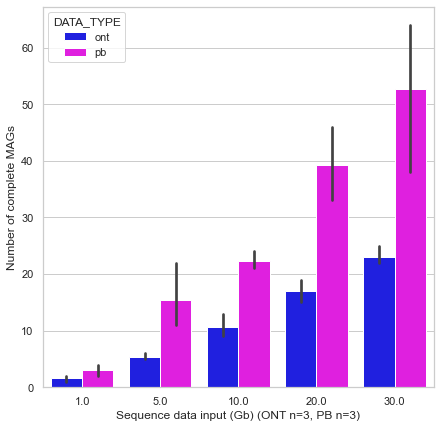

In [ ]:
#barplot looking at overall distibution, note Gb 40 only has 2 replicates which is why its off
plt.figure(figsize=(7,7))
bp_complete=sns.barplot(data=nohyb30, x="data_size_Gb", y="Complete", hue="DATA_TYPE", palette=['blue', 'magenta']);
bp_complete.set(xlabel='Sequence data input (Gb) (ONT n=3, PB n=3)', ylabel='Number of complete MAGs')
plt.savefig("../Figures/supp_fig3D_subinput_Gb_cMAGs.png", dpi=600)

In [107]:
nohyb30.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
98,YES,A6,SUB_01G,metaflye,ont,880.92,37.40,34.0,107.0,8.606,...,NaN,1,0,1.000000e+09,1000.0,1.0,27158.0,17.0,81678.0,1.0
101,YES,A6,SUB_01G,metamdbg,pb,914.16,7.65,51.0,103.0,8.753,...,1.250000,1,0,1.000002e+09,1000.0,1.0,9690.0,33.0,121466.0,1.0
102,YES,A6,SUB_05G,metaflye,ont,2289.20,47.11,95.0,707.0,21.692,...,NaN,1,0,5.000004e+09,5000.0,5.0,27267.0,17.0,406805.0,1.0
105,YES,A6,SUB_05G,metamdbg,pb,3176.06,42.58,126.0,1107.0,28.900,...,1.923077,1,0,5.000009e+09,5000.0,5.0,9689.0,33.0,607775.0,1.0
106,YES,A6,SUB_10G,metaflye,ont,3459.43,67.94,142.0,1302.0,32.104,...,NaN,1,0,1.000000e+10,10000.0,10.0,27340.0,17.0,812270.0,1.0


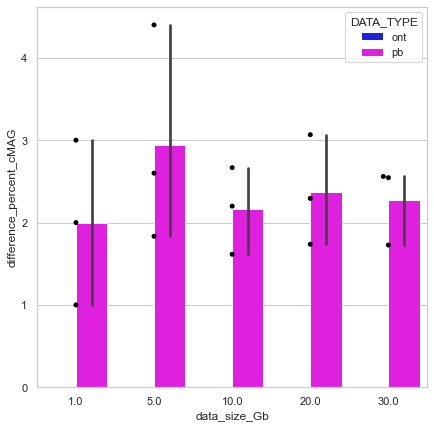

In [ ]:
#plot looking at average x fold increase in MAGs across data input levels
#not significant across depths
plt.figure(figsize=(7,7))
sns.barplot(data=nohyb30, x="data_size_Gb", y="difference_percent_cMAG", hue="DATA_TYPE", palette=['blue', 'magenta'])
sns.swarmplot(data=nohyb30, x="data_size_Gb", y="difference_percent_cMAG", palette=['black'])
plt.savefig("../Figures/supp_fig3E_enrichment_ONTvsPB.png", dpi=600)


count    15.000000
mean      2.349716
std       0.798421
min       1.000000
25%       1.785088
50%       2.294118
75%       2.633333
max       4.400000
Name: difference_percent_cMAG, dtype: float64

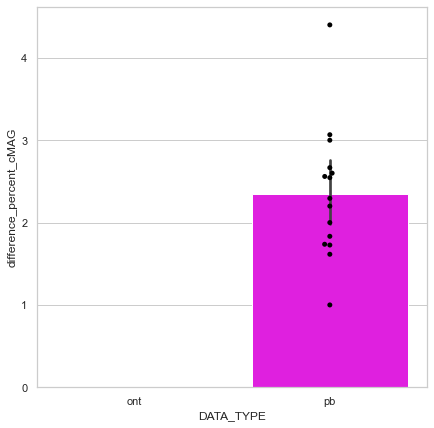

In [ ]:
#plot looking at the average enrichment % across all subsampled replicates from 1 Gb - 30 Gb
plt.figure(figsize=(7,7))
sns.barplot(data=nohyb30, x="DATA_TYPE", y="difference_percent_cMAG", palette=['magenta'])
sns.swarmplot(data=nohyb30, x="DATA_TYPE", y="difference_percent_cMAG", palette=['black'])
plt.savefig("../Figures/supp_fig3F_enrichment2_ONTvsPB.png", dpi=600)
nohyb30.difference_percent_cMAG.describe()
# 2.34 mean .79 stdev n=15

In [111]:
nohyb30.head()

,HSAP_FILTER,GROUP,SUBSET_GROUP,ASSEMBLY_METHOD,DATA_TYPE,Completeness,Contamination,Contig_Number,Avg_Depth,Coding_Density,...,difference_percent_hqMAG,30Gb,hybrid,Total_bases,Mb,data_size_Gb,Read_length_N50,Median_read_quality,Number_of_reads,data_avail_PB_ONT
98,YES,A6,SUB_01G,metaflye,ont,880.92,37.40,34.0,107.0,8.606,...,NaN,1,0,1.000000e+09,1000.0,1.0,27158.0,17.0,81678.0,1.0
101,YES,A6,SUB_01G,metamdbg,pb,914.16,7.65,51.0,103.0,8.753,...,1.250000,1,0,1.000002e+09,1000.0,1.0,9690.0,33.0,121466.0,1.0
102,YES,A6,SUB_05G,metaflye,ont,2289.20,47.11,95.0,707.0,21.692,...,NaN,1,0,5.000004e+09,5000.0,5.0,27267.0,17.0,406805.0,1.0
105,YES,A6,SUB_05G,metamdbg,pb,3176.06,42.58,126.0,1107.0,28.900,...,1.923077,1,0,5.000009e+09,5000.0,5.0,9689.0,33.0,607775.0,1.0
106,YES,A6,SUB_10G,metaflye,ont,3459.43,67.94,142.0,1302.0,32.104,...,NaN,1,0,1.000000e+10,10000.0,10.0,27340.0,17.0,812270.0,1.0


In [59]:
## Create figure for 